<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/Regresion-Models/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing

Types of Natural Language Processing

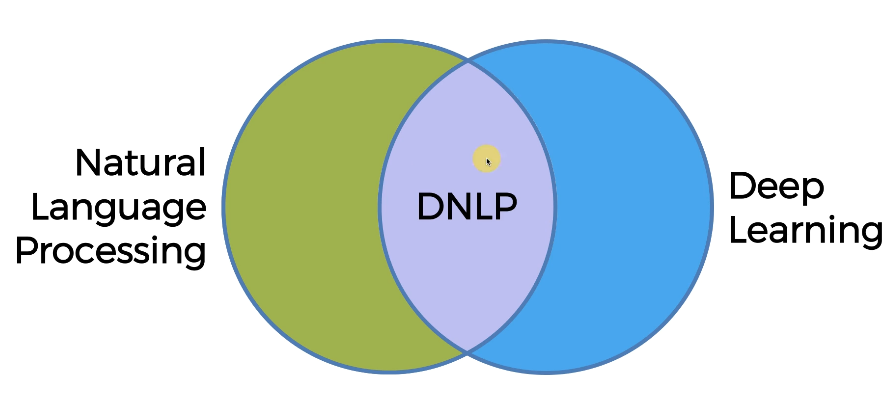


Seq2Seq is most cutting edge and most powerful in NLP. They come in DNLP.



Classical vs Deep Learning Models

E.g.:
a) NLP

1. If/else Rules(Chatbot)
2. Audio Frequency Components analysis (Speech Recognition)
3. Bag-Of-Words Model (Classifiction)

b) DNLP(Deep Natural Language Processing)

1. CNN for text recognition (Classifictaion)

c) Seq2Seq (many applications)



#Bag Of Worlds Model

We create a model to give a yes/no response.

we have a vector of 0's (number of words used on average for native english lamguage speakers)

Every word on English Language have a position on this vector.

SOS -> Start of Sentence Pointer
EOS -> End of Sentence Pointer

Special Words are at the end(the last element)

It is going to be a sparse vector

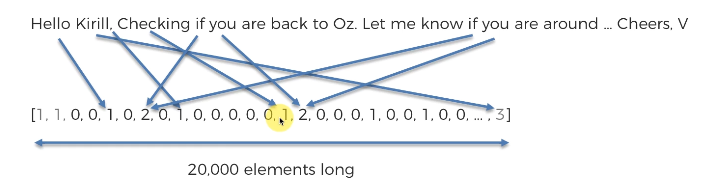



Now, we are going to look at the training data. 

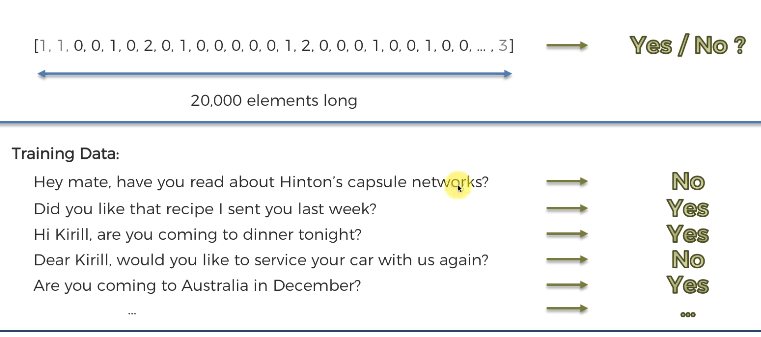


We will convert this training data into vector 

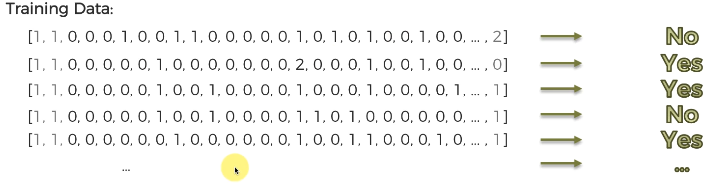

We apply a model. In this case, Logistic regression is most suitable.

Then we feed our actual vector. then we get a response.(Yes/No)

We can also use a Neural Network.(DNLP)




#Bag Of Words (Sentimental Analysis)



####Dataset
It is now a tsv. (tab seperated value).
csv is comma seperated value.

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing Datasets

In [2]:
#read the file as tab seperated value
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
#not using quoting parameter can lead to an execution error
# 3 is chosen to show that we ignore those quotes


##Cleaning the texts



essential step in NLP

[re library documentation](https://docs.python.org/3/library/re.html)

[Classic NLP Library (nltk)](https://www.nltk.org/)

In [9]:
import re
import nltk
nltk.download('stopwords')
#stopwords are words that wont help us in the prediction
#words like the, a, an etc
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#stemming consists of taking only the root of the word
#,, Oh, I loved this restaurant '' loved -> love to better recognize
#we will have love and loved as columns since they menan the same thing
#it will yield nothing


#it will contain all the cleaned reviews in this list
corpus = []
#wwe will make a for loop to iterate through our dataset
#Cleaning Process
#then add it to corpus

'''
I used df.shape[0] to get an int value of the number of rows
we can also use the actual value 
'''
for i in range(0,df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)



'''
review is the variable which will get cleaned step by step.

Step 1: 
We will remove all the punctuations

re.sub('[^a-zA-Z]', ' ')

^ stands for not to be included
a-z all small alphabets
A-Z all large alphabets
' ' are to be replaced by space

third parameter is where the dataset is going to be worked on
df['Review'][i]
Review column and i is the value getting iterated

Step 2:
Capital letters to lowercase

Step 3:
Splitting Different elements of reviews in different words
for preparing for stemming


STEMMING
We will simplify words in order to get better results

we create an object of class PorterStemmer
then we will update review
we will use a single line for loop to simplify our words

review = [for word in review if not word in set(stopwords.words('english'))]

we are using english so in stopwords we choose english words
set have unique values


review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

we will apply stemming to the object we created

We will now join the words together to get the original format in the string

review = ' '.join(review)
we will join them with a space in this manner

now, we will put it back into corpus
'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"\nreview is the variable which will get cleaned step by step.\n\nStep 1: \nWe will remove all the punctuations\n\nre.sub('[^a-zA-Z]', ' ')\n\n^ stands for not to be included\na-z all small alphabets\nA-Z all large alphabets\n' ' are to be replaced by space\n\nthird parameter is where the dataset is going to be worked on\ndf['Review'][i]\nReview column and i is the value getting iterated\n\nStep 2:\nCapital letters to lowercase\n\nStep 3:\nSplitting Different elements of reviews in different words\nfor preparing for stemming\n\n\nSTEMMING\nWe will simplify words in order to get better results\n\nwe create an object of class PorterStemmer\nthen we will update review\nwe will use a single line for loop to simplify our words\n\nreview = [for word in review if not word in set(stopwords.words('english'))]\n\nwe are using english so in stopwords we choose english words\nset have unique values\n\n\nreview = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]\n\nw

##Creating the Bag Of Words model

In [10]:
#Creating a Sparse Matrix
# Tokenization is taking all these words and storing them in reviews(variable)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In the dataset, the statement ,,Crust is not good" was changed to ,,crust good" which is wromg because we expected a negative statement but got a positive one instead. 
We will change our stopwords variable and create a new variable
We see the problem as the including not in the stopwords at the worng place.


We wil change it by adding the new variable and .remove() method where .remove('not') will be used.

In [11]:
#we will do tokenisation with a module from scikit learn
#the module feature extraction will used
#the sub_module text will be used
# we will import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

'''
cv takes one important parameter that is used for including teh maximum number of words.
it is important because there are some words that are still not good for predictions.
But we dont know the maximum size of the parameter yet
We will run this cell and get the total number of columns and then reduce the sparse matrix.
'''

'\ncv takes one important parameter that is used for including teh maximum number of words.\nit is important because there are some words that are still not good for predictions.\nBut we dont know the maximum size of the parameter yet\nWe will run this cell and get the total number of columns and then reduce the sparse matrix.\n'

In [12]:
#fit method will take all these words and transform will put it into columns
X = cv.fit_transform(corpus)

In [13]:
type(X)

scipy.sparse.csr.csr_matrix

In [16]:
#array is the expected input so we will change the type
X = cv.fit_transform(corpus).toarray()

In [17]:
#now, we will create the dependent variable y
df['Liked']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [19]:
y = df.iloc[:, -1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [20]:
#Now, we will figure out the number of columns of sparse matrix
len(X[0])

1566

In [21]:
#That was the result of tokenisation
##now, will adjust our model
cv = CountVectorizer(max_features=1500)
#trying for 1500 most frequent columns
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values
len(X[0])

1500

##Splitting the dataset into the training set and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

##Training the Naive Bayes model on the training set

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##Predicting the Test Set Results

In [25]:
pred = gnb.predict(X_test)

##Evaluating the model

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



[[55 42]
 [12 91]]


0.73


##Predicting if a single review is positive or negative

We will review the statements given below:-

1. I Love this restaurant so much

2. I hate this restaurant so much

###Positive Review


In [32]:
#We will just repeat the text processing but for a single review
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = gnb.predict(new_X_test)
print(new_y_pred)

[1]


The review was correct because it was a positive review.

###Negative Review

In [34]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = gnb.predict(new_X_test)
print(new_y_pred)

[0]


The review was correct because the this was a negative review.